In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
car_data = pd.read_csv('Car_sales_transactions.csv', sep=",",header = 0, encoding='latin')
car_data.head()

,Sales_ID,Name,Year,Selling_Price,km_Driven,City_Code,State_Code,Postal_Code,Fuel,Seller_Type,Transmission,Owner,Mileage,Engine,Max_Power,Seats
0,1,Maruti Swift Dzire VDI,2014,450000,145500,CT01,ST15,400001,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,CT28,ST11,834001,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5
2,3,Honda City 2017-2020 EXi,2006,158000,140000,CT12,ST28,201301,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5
3,4,Hyundai i20 Sportz Diesel,2010,225000,127000,CT21,ST27,248001,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5
4,5,Maruti Swift VXI BSIII,2007,130000,120000,CT03,ST24,600020,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5


In [3]:
sales_status = pd.read_csv('Sales_Status.csv')
city_master = pd.read_excel('City_Master.xlsx')
region = pd.read_excel('Region_Master.xlsx')
region_state = pd.read_excel('Region_State_Mapping.xlsx')
state = pd.read_excel('State_Master.xlsx')
car_data = pd.merge(car_data,city_master[['City_Code','City_Name']],how ='left',on='City_Code')
car_data = pd.merge(car_data,region_state, how ='left',on='State_Code')
car_data = pd.merge(car_data,sales_status, how = 'left', on='Sales_ID')
car_data = pd.merge(car_data,state, how = 'left', on='State_Code')
car_data = pd.merge(car_data,region, how = 'left', on='Region_Code')
car_data.head()

,Sales_ID,Name,Year,Selling_Price,km_Driven,City_Code,State_Code,Postal_Code,Fuel,Seller_Type,...,Owner,Mileage,Engine,Max_Power,Seats,City_Name,Region_Code,Sold,State_Name,Region
0,1,Maruti Swift Dzire VDI,2014,450000,145500,CT01,ST15,400001,Diesel,Individual,...,First Owner,23.4 kmpl,1248 CC,74 bhp,5,Mumbai,R3,Y,Maharashtra,West
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,CT28,ST11,834001,Diesel,Individual,...,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5,Ranchi,R2,Y,Jharkhand,East
2,3,Honda City 2017-2020 EXi,2006,158000,140000,CT12,ST28,201301,Petrol,Individual,...,Third Owner,17.7 kmpl,1497 CC,78 bhp,5,Noida,R1,Y,Uttar Pradesh,Central
3,4,Hyundai i20 Sportz Diesel,2010,225000,127000,CT21,ST27,248001,Diesel,Individual,...,First Owner,23.0 kmpl,1396 CC,90 bhp,5,Dehradun,R1,Y,Uttarakhand,Central
4,5,Maruti Swift VXI BSIII,2007,130000,120000,CT03,ST24,600020,Petrol,Individual,...,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5,Chennai,R4,Y,Tamil Nadu,South


In [4]:
car_data.drop(['State_Name','Region','City_Name'],axis=1,inplace=True)

In [5]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 7905
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales_ID       7906 non-null   int64 
 1   Name           7906 non-null   object
 2   Year           7906 non-null   int64 
 3   Selling_Price  7906 non-null   int64 
 4   km_Driven      7906 non-null   int64 
 5   City_Code      7906 non-null   object
 6   State_Code     7906 non-null   object
 7   Postal_Code    7906 non-null   int64 
 8   Fuel           7906 non-null   object
 9   Seller_Type    7906 non-null   object
 10  Transmission   7906 non-null   object
 11  Owner          7906 non-null   object
 12  Mileage        7906 non-null   object
 13  Engine         7906 non-null   object
 14  Max_Power      7906 non-null   object
 15  Seats          7906 non-null   int64 
 16  Region_Code    7906 non-null   object
 17  Sold           7906 non-null   object
dtypes: int64(6), object(12)
memo

In [6]:
car_data.shape

(7906, 18)

<AxesSubplot:>

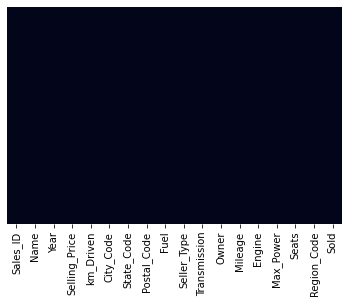

In [7]:
sns.heatmap(car_data.isnull(),yticklabels=False,cbar=False)

##From the above graph no null values are found in the data

In [8]:
car_data['brand']=car_data['Name'].apply(lambda x:x.split()[0])
car_data['Mileage']=car_data['Mileage'].apply(lambda x:x.split()[0]).astype('float64')
car_data['Engine']=car_data['Engine'].apply(lambda x:x.split()[0]).astype('int64')
car_data['Max_Power']=car_data['Max_Power'].apply(lambda x:x.split()[0]).astype('float64')
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 7905
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sales_ID       7906 non-null   int64  
 1   Name           7906 non-null   object 
 2   Year           7906 non-null   int64  
 3   Selling_Price  7906 non-null   int64  
 4   km_Driven      7906 non-null   int64  
 5   City_Code      7906 non-null   object 
 6   State_Code     7906 non-null   object 
 7   Postal_Code    7906 non-null   int64  
 8   Fuel           7906 non-null   object 
 9   Seller_Type    7906 non-null   object 
 10  Transmission   7906 non-null   object 
 11  Owner          7906 non-null   object 
 12  Mileage        7906 non-null   float64
 13  Engine         7906 non-null   int64  
 14  Max_Power      7906 non-null   float64
 15  Seats          7906 non-null   int64  
 16  Region_Code    7906 non-null   object 
 17  Sold           7906 non-null   object 
 18  brand   

In [9]:
car_data.columns

Index(['Sales_ID', 'Name', 'Year', 'Selling_Price', 'km_Driven', 'City_Code',
       'State_Code', 'Postal_Code', 'Fuel', 'Seller_Type', 'Transmission',
       'Owner', 'Mileage', 'Engine', 'Max_Power', 'Seats', 'Region_Code',
       'Sold', 'brand'],
      dtype='object')

In [10]:
car_data.drop(['Sales_ID','Name','State_Code','Postal_Code','Region_Code','City_Code'],axis=1,inplace=True)

In [11]:
car_data.describe()

,Year,Selling_Price,km_Driven,Mileage,Engine,Max_Power,Seats
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,19.419861,1458.708829,91.587374,5.416393
std,3.863695,8.135827e+05,5.679230e+04,4.036263,503.893057,35.747216,0.959208
min,1994.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,32.800000,2.000000
25%,2012.000000,2.700000e+05,3.500000e+04,16.780000,1197.000000,68.050000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,5.000000
75%,2017.000000,6.900000e+05,9.542500e+04,22.320000,1582.000000,102.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


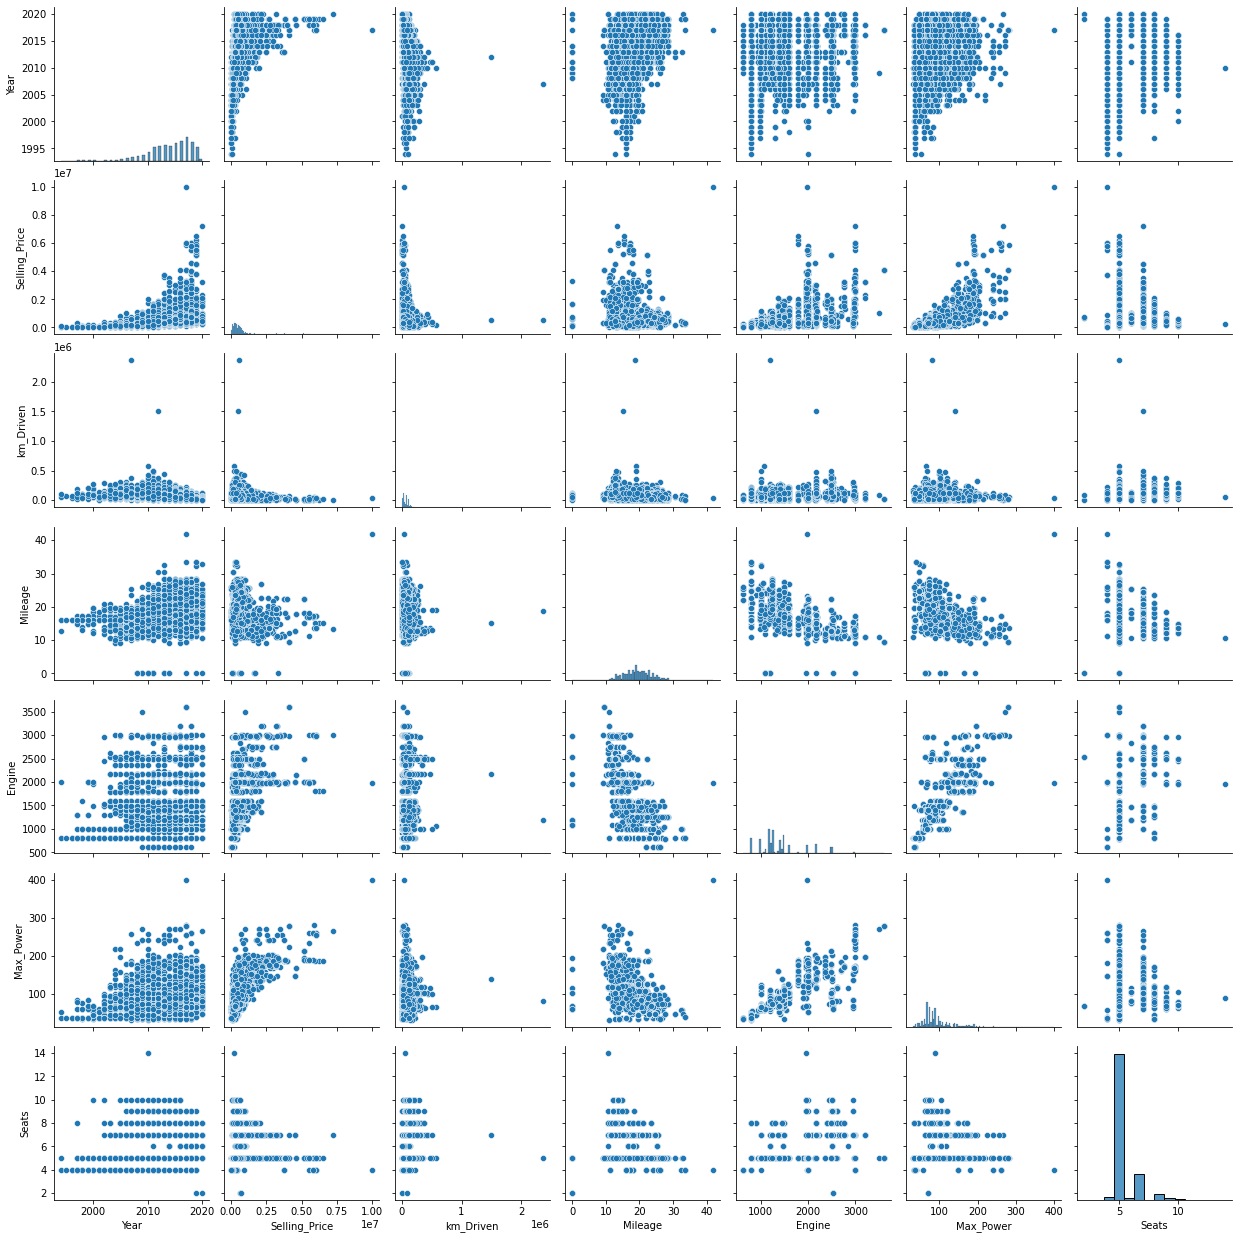

In [12]:
sns.pairplot(car_data)

Text(0, 0.5, 'Selling_Price')

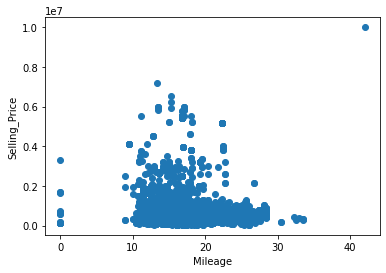

In [13]:
plt.scatter(car_data['Mileage'],car_data['Selling_Price'])
plt.xlabel('Mileage')
plt.ylabel('Selling_Price')

In [14]:
car_data[car_data['Mileage']==np.min(car_data['Mileage'])].shape

(17, 13)

Text(0, 0.5, 'Selling_Price')

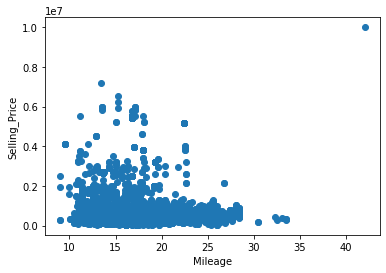

In [15]:
car_data.drop(car_data[car_data['Mileage']==np.min(car_data['Mileage'])].index,axis=0,inplace=True)
#After dropping outliers
plt.scatter(car_data['Mileage'],car_data['Selling_Price'])
plt.xlabel('Mileage')
plt.ylabel('Selling_Price')

Text(0, 0.5, 'Selling_Price')

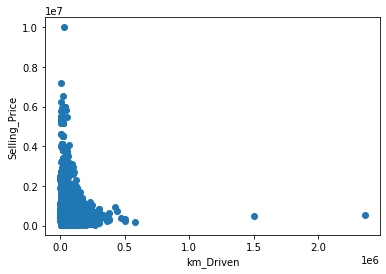

In [16]:
plt.scatter(car_data['km_Driven'],car_data['Selling_Price'])
plt.xlabel('km_Driven')
plt.ylabel('Selling_Price')

In [17]:
car_data['km_Driven'].sort_values(ascending=False).head(2).index

Int64Index([3377, 1757], dtype='int64')

Text(0, 0.5, 'Selling_Price')

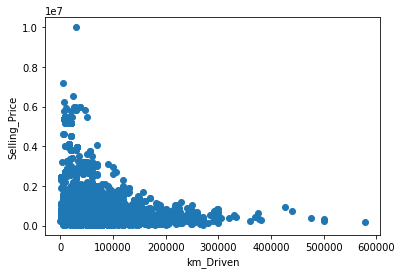

In [18]:
car_data.drop(car_data['km_Driven'].sort_values(ascending=False).head(2).index,axis=0,inplace=True)
#After dropping outliers
plt.scatter(car_data['km_Driven'],car_data['Selling_Price'])
plt.xlabel('km_Driven')
plt.ylabel('Selling_Price')

Text(0, 0.5, 'Selling_Price')

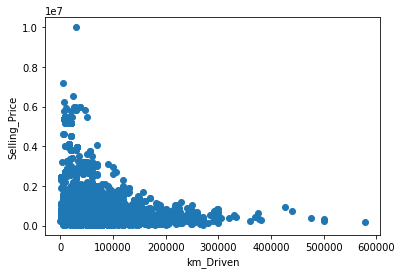

In [19]:
plt.scatter(car_data['km_Driven'],car_data['Selling_Price'])
plt.xlabel('km_Driven')
plt.ylabel('Selling_Price')

In [20]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7887 entries, 0 to 7905
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           7887 non-null   int64  
 1   Selling_Price  7887 non-null   int64  
 2   km_Driven      7887 non-null   int64  
 3   Fuel           7887 non-null   object 
 4   Seller_Type    7887 non-null   object 
 5   Transmission   7887 non-null   object 
 6   Owner          7887 non-null   object 
 7   Mileage        7887 non-null   float64
 8   Engine         7887 non-null   int64  
 9   Max_Power      7887 non-null   float64
 10  Seats          7887 non-null   int64  
 11  Sold           7887 non-null   object 
 12  brand          7887 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 862.6+ KB


In [21]:
car_data=pd.get_dummies(car_data,prefix='n',drop_first=True)
X=car_data.drop(['Selling_Price'],axis=1)
y=car_data['Selling_Price']
car_data.columns

Index(['Year', 'Selling_Price', 'km_Driven', 'Mileage', 'Engine', 'Max_Power',
       'Seats', 'n_Diesel', 'n_LPG', 'n_Petrol', 'n_Individual',
       'n_Trustmark Dealer', 'n_Manual', 'n_Fourth & Above Owner',
       'n_Second Owner', 'n_Test Drive Car', 'n_Third Owner', 'n_Y', 'n_Ashok',
       'n_Audi', 'n_BMW', 'n_Chevrolet', 'n_Daewoo', 'n_Datsun', 'n_Fiat',
       'n_Force', 'n_Ford', 'n_Honda', 'n_Hyundai', 'n_Isuzu', 'n_Jaguar',
       'n_Jeep', 'n_Kia', 'n_Land', 'n_Lexus', 'n_MG', 'n_Mahindra',
       'n_Maruti', 'n_Mercedes-Benz', 'n_Mitsubishi', 'n_Nissan', 'n_Opel',
       'n_Renault', 'n_Skoda', 'n_Tata', 'n_Toyota', 'n_Volkswagen',
       'n_Volvo'],
      dtype='object')

In [22]:
X.head(10)

,Year,km_Driven,Mileage,Engine,Max_Power,Seats,n_Diesel,n_LPG,n_Petrol,n_Individual,...,n_Mercedes-Benz,n_Mitsubishi,n_Nissan,n_Opel,n_Renault,n_Skoda,n_Tata,n_Toyota,n_Volkswagen,n_Volvo
0,2014,145500,23.40,1248,74.00,5,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2014,120000,21.14,1498,103.52,5,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,2006,140000,17.70,1497,78.00,5,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,2010,127000,23.00,1396,90.00,5,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2007,120000,16.10,1298,88.20,5,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5,2017,45000,20.14,1197,81.86,5,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
6,2007,175000,17.30,1061,57.50,5,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
7,2001,5000,16.10,796,37.00,4,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
8,2011,90000,23.59,1364,67.10,5,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
9,2013,169000,20.00,1399,68.10,5,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#As we are using Linear regression performed future Scaling
#As from the pairplot histograms there is no guassian distribution observed so performed MinMax scaling instead of Standard Scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
ScaledX=scaler.fit_transform(X)
X=pd.DataFrame(ScaledX,columns=X.columns)
X.head(10)

,Year,km_Driven,Mileage,Engine,Max_Power,Seats,n_Diesel,n_LPG,n_Petrol,n_Individual,...,n_Mercedes-Benz,n_Mitsubishi,n_Nissan,n_Opel,n_Renault,n_Skoda,n_Tata,n_Toyota,n_Volkswagen,n_Volvo
0,0.769231,0.251984,0.436364,0.209396,0.112200,0.1,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.769231,0.207822,0.367879,0.293289,0.192593,0.1,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.461538,0.242459,0.263636,0.292953,0.123094,0.1,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.615385,0.219945,0.424242,0.259060,0.155773,0.1,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.500000,0.207822,0.215152,0.226174,0.150871,0.1,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.884615,0.077932,0.337576,0.192282,0.133606,0.1,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.500000,0.303074,0.251515,0.146644,0.067266,0.1,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.269231,0.008658,0.215152,0.057718,0.011438,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.653846,0.155866,0.442121,0.248322,0.093410,0.1,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.730769,0.292683,0.333333,0.260067,0.096133,0.1,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
y.head(10)

0    450000
1    370000
2    158000
3    225000
4    130000
5    440000
6     96000
7     45000
8    350000
9    200000
Name: Selling_Price, dtype: int64

In [25]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score,make_scorer

In [26]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
model_params={
    'Linear_regression':{
        'model':LinearRegression(),
        'params':{}
    },
    'DesicionTreeRegressor':{
        'model':DecisionTreeRegressor(),
        'params': {
            'criterion' : ['mse','friedman_mse'],
            'splitter': ['best','random']
        }
        
    },
    'RandomForestRegressor':{
        'model':RandomForestRegressor(),
        'params': {
            'max_features': ['auto', 'sqrt'],
            'n_estimators': [40,50,60]
        }
        
    }
}
model_params.items()

dict_items([('Linear_regression', {'model': LinearRegression(), 'params': {}}), ('DesicionTreeRegressor', {'model': DecisionTreeRegressor(), 'params': {'criterion': ['mse', 'friedman_mse'], 'splitter': ['best', 'random']}}), ('RandomForestRegressor', {'model': RandomForestRegressor(), 'params': {'max_features': ['auto', 'sqrt'], 'n_estimators': [40, 50, 60]}})])

In [43]:
score=[]
cv=StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
for model_name,mp in model_params.items():
    clf=GridSearchCV(mp['model'],mp['params'],cv=cv,return_train_score=False)
    clf.fit(Xtrain,ytrain)
    score.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    }
    )
df=pd.DataFrame(score,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,Linear_regression,0.841350,{}
1,DesicionTreeRegressor,0.935423,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
2,RandomForestRegressor,0.959131,"{'max_features': 'auto', 'n_estimators': 40}"


In [46]:
rf=RandomForestRegressor(n_estimators=clf.best_params_['n_estimators'],max_features=clf.best_params_['max_features'])
rf.fit(Xtrain,ytrain)
rf.score(Xtest,ytest)

0.9788715129953792

In [47]:
ypredict=rf.predict(Xtest)
print("MSE:"+str(mean_squared_error(ytest,ypredict)))
print("RMSE:"+str(np.sqrt(mean_squared_error(ytest,ypredict))))

MSE:15816258835.427845
RMSE:125762.70844502294


In [48]:
print(rf.score(Xtrain,ytrain),rf.score(Xtest,ytest))

0.9940552774376509 0.9788715129953792


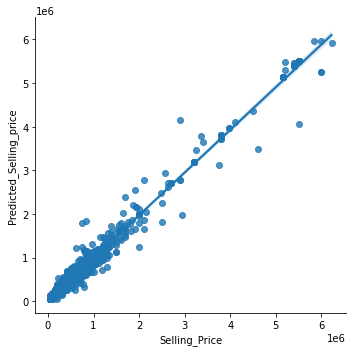

In [49]:
y_test=pd.DataFrame(ytest)
y_test["Predicted_Selling_price"]=ypredict
sns.lmplot(x='Selling_Price',y='Predicted_Selling_price',data=y_test)

In [51]:
newdf=pd.DataFrame(scaler.fit_transform(y_test),columns=y_test.columns)
newdf.head(10)
print("MSE:"+str(mean_squared_error(newdf['Selling_Price'],newdf['Predicted_Selling_price'])))
print("RMSE:"+str(np.sqrt(mean_squared_error(newdf['Selling_Price'],newdf['Predicted_Selling_price']))))

MSE:0.00046254250927478866
RMSE:0.021506801465461772


In [52]:
feature_importance=pd.DataFrame(data=rf.feature_importances_,index=X.columns.tolist(),columns=['Importance'])

In [53]:
f_imp=feature_importance.sort_values(by='Importance',ascending=False).head(10)
f_imp.reset_index(inplace=True)


Text(0.5, 1.0, 'Top 10 Feature Importance')

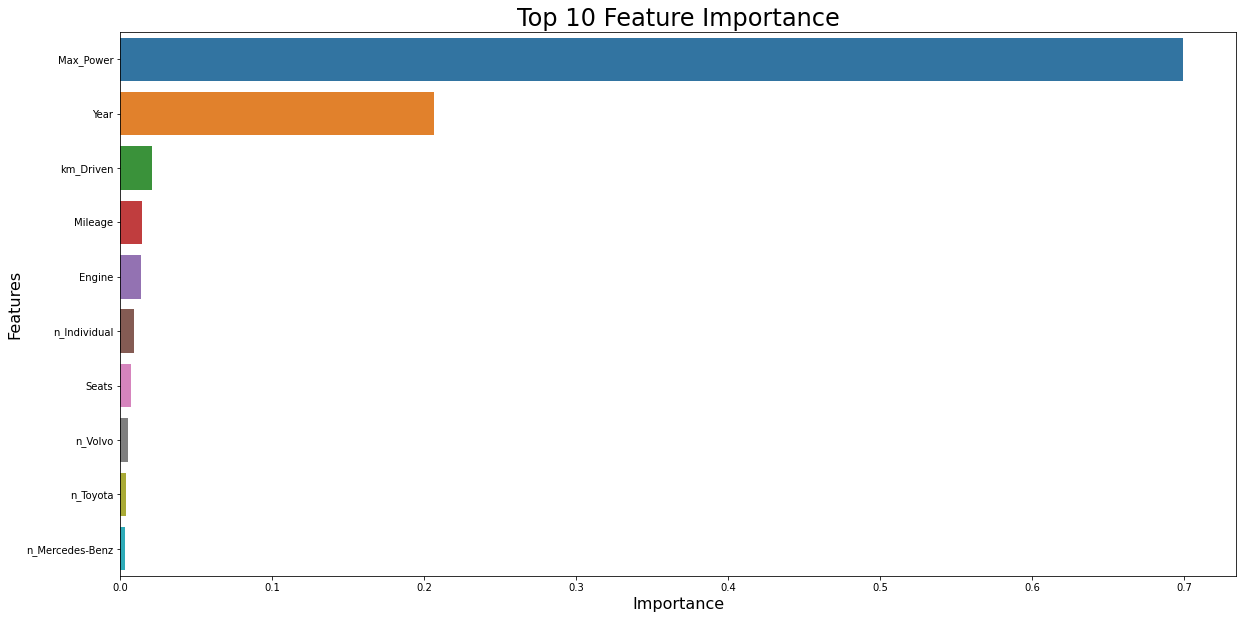

In [54]:
plt.figure(figsize=(20,10))
sns.barplot(x='Importance',y='index',data=f_imp,orient='h',ci=None)
plt.xlabel('Importance',fontsize=16)
plt.ylabel('Features',fontsize=16)
plt.title('Top 10 Feature Importance',fontsize=24)